In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"E:\Data Analytics Class\Project\Dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.isnull().sum()/len(df)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [7]:
df=df.dropna(subset=['CustomerID'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [37]:
df=df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [11]:
df=df[df['Quantity']>0]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  object        
 7   Country      397924 non-null  object        
 8   Sales        397924 non-null  float64       
 9   Month        397924 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[M](1)
memory usage: 33.4+ MB


In [13]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [34]:
df['CustomerID']=df['CustomerID'].astype(str)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  object        
 7   Country      397924 non-null  object        
 8   Sales        397924 non-null  float64       
 9   Month        397924 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[M](1)
memory usage: 33.4+ MB


In [15]:
df['Sales']=df['Quantity']*df['UnitPrice']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   Sales        397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [17]:
df['Sales'].sum()

np.float64(8911407.904)

In [19]:
total_sales=df['Sales'].sum()
print("Total Sales: ", total_sales)

Total Sales:  8911407.904


In [20]:
df['InvoiceNo'].nunique()

18536

In [21]:
total_orders=df['InvoiceNo'].nunique()
print("Total Orders: ",total_orders)

Total Orders:  18536


In [22]:
df['CustomerID'].nunique()

4339

In [23]:
total_customers=df['CustomerID'].nunique()
print("Total Customers: ", total_customers)

Total Customers:  4339


# Monthly Sales Analysis

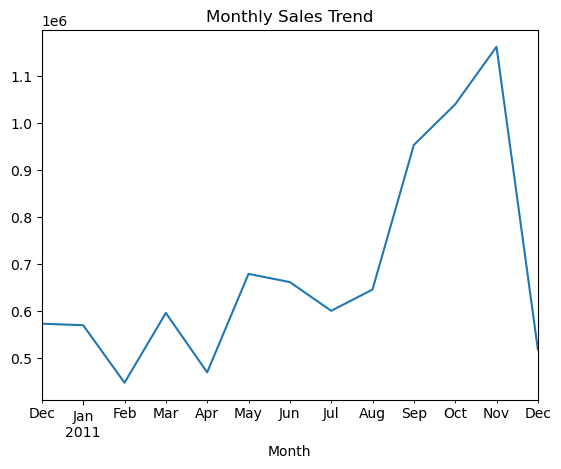

In [27]:
df['Month']=df['InvoiceDate'].dt.to_period('M')
monthly_sales=df.groupby('Month')['Sales'].sum()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.show()

# Top 10 Products

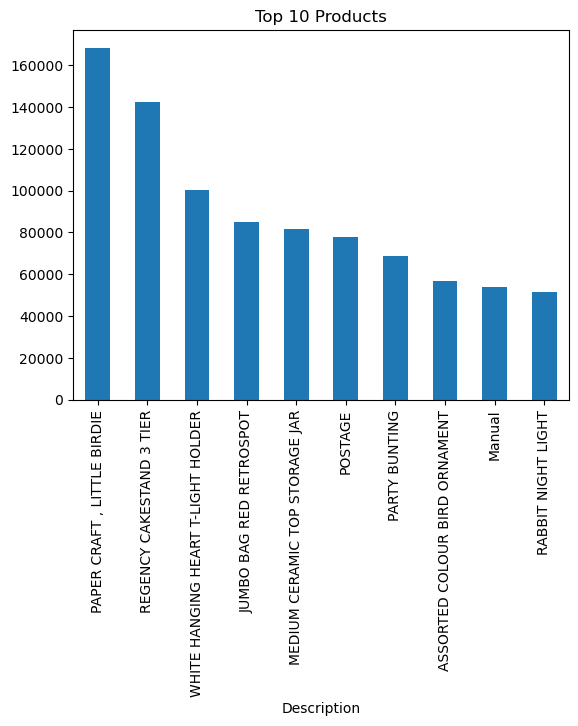

In [30]:
top_products =  df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar')
plt.title("Top 10 Products")
plt.show()

# Countrywise Sales

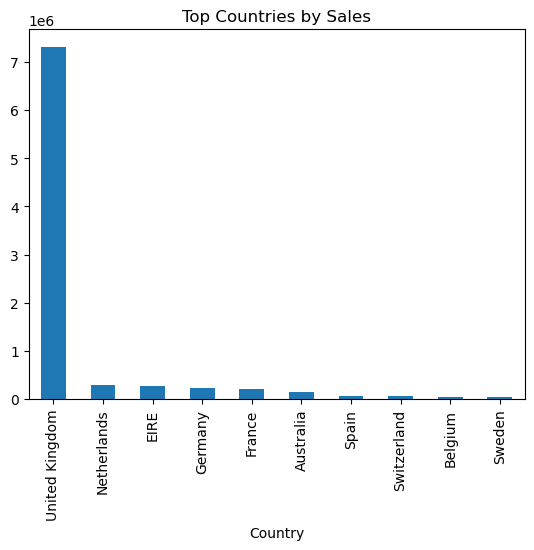

In [31]:
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar')
plt.title("Top Countries by Sales")
plt.show()

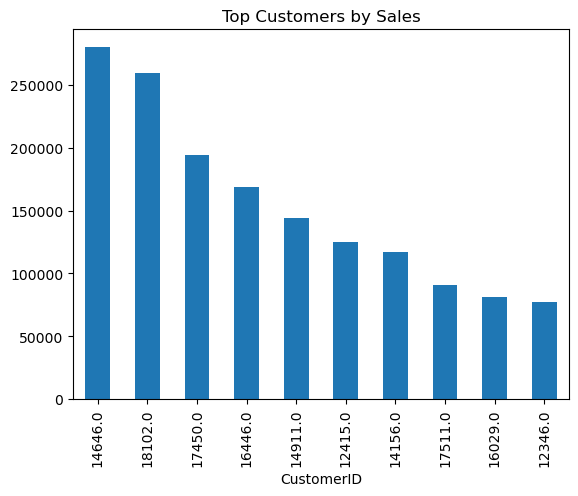

In [36]:
top_customers=df.groupby('CustomerID')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar')
plt.title("Top Customers by Sales")
plt.show()

In [42]:
df.to_csv("Cleaned_Retail_Data.csv",index=False)